<a href="https://colab.research.google.com/github/ernesto-miguez/Machine-Learning-training/blob/master/3_Maneras_de_programar_una_Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 Maneras de Programar una Red Neuronal

In [0]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

## Código inicial

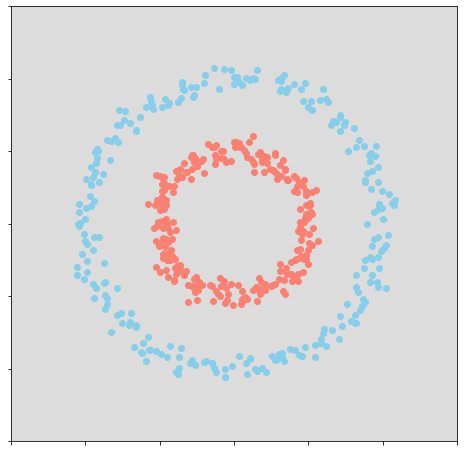

In [2]:
# Creamos nuestros datos artificiales, donde buscaremos clasificar dos anillos concéntricos de datos
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Resolución del mapa de predicción
res = 100

# Coordenadas del mapa de predicción
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combo de coordenadas del mapa de predicción
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1,2)

# Objeto vacío a 0.5 del mapa de predicción
_pY = np.zeros((res,res)) + 0.5

# Visualización del mapa de predicción
plt.figure(figsize=(8,8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

# Visialización de la nube de datos
plt.scatter(X[Y == 0,0], X[Y == 0,1], c='skyblue')
plt.scatter(X[Y == 1,0], X[Y == 1,1], c='salmon')

plt.tick_params(labelbottom=False, labelleft=False)

## 1. Tensorflow

In [3]:
%tensorflow_version 1.x
import tensorflow as tf
from matplotlib import animation
from IPython.core.display import display, HTML

TensorFlow 1.x selected.


Step 0 / 1000 - Loss =  0.39087236 - Acc = 0.514
Step 25 / 1000 - Loss =  0.3336668 - Acc = 0.546
Step 50 / 1000 - Loss =  0.26576704 - Acc = 0.628
Step 75 / 1000 - Loss =  0.22436254 - Acc = 0.774
Step 100 / 1000 - Loss =  0.2037912 - Acc = 0.84
Step 125 / 1000 - Loss =  0.18547961 - Acc = 0.866
Step 150 / 1000 - Loss =  0.16760117 - Acc = 0.876
Step 175 / 1000 - Loss =  0.14991747 - Acc = 0.888
Step 200 / 1000 - Loss =  0.12966454 - Acc = 0.904
Step 225 / 1000 - Loss =  0.105274655 - Acc = 0.922
Step 250 / 1000 - Loss =  0.07909355 - Acc = 0.948
Step 275 / 1000 - Loss =  0.05766118 - Acc = 0.968
Step 300 / 1000 - Loss =  0.041202836 - Acc = 0.984
Step 325 / 1000 - Loss =  0.029641021 - Acc = 0.998
Step 350 / 1000 - Loss =  0.022807434 - Acc = 1.0
Step 375 / 1000 - Loss =  0.018480273 - Acc = 1.0
Step 400 / 1000 - Loss =  0.015552986 - Acc = 1.0
Step 425 / 1000 - Loss =  0.013494507 - Acc = 1.0
Step 450 / 1000 - Loss =  0.011976743 - Acc = 1.0
Step 475 / 1000 - Loss =  0.010791767 - A

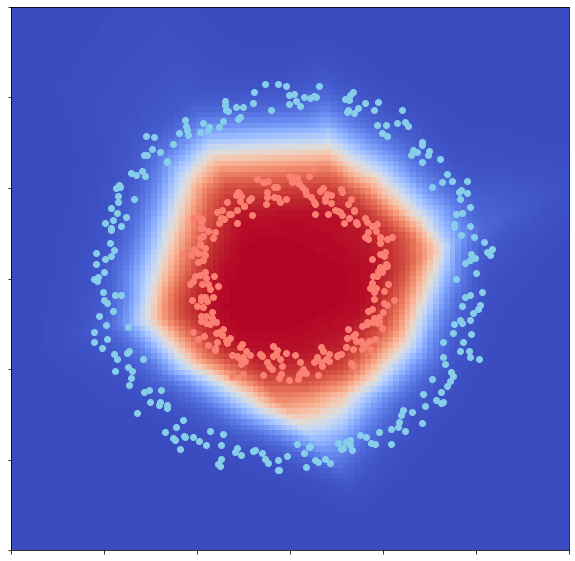

In [5]:
# Definimos los puntos de entrada de la red, para la matrix X e Y
iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])

lr = 0.05           # Learning rate
nn = [2, 16, 8, 1]  # Número de neuronas por capa

# Capa 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')

l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# Capa 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')

l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# Capa 3 
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

# Vector de predicciones de Y
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]

# Evaluación de las predicciones
loss = tf.losses.mean_squared_error(pY, iY)

# Definimos al optimizador de la red, para que minimice el error
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)

n_steps = 1000 # Número de ciclos de entrenamiento

iPY = []

with tf.Session() as sess:

  # Inicializamos todos los parámteros de la red, las matrices W y b
  sess.run(tf.global_variables_initializer())

  # Iteramos n pases de entrenamiento
  for step in range(n_steps):

    # Evaluamos al optimizador, la función de coste y el tensor de salida pY
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={iX : X, iY: Y})

    # Cada 25 iteraciones, imprimimos métricas
    if step % 25 == 0:

      # Cálculo del accuracy
      acc = np.mean(np.round(_pY) == Y)

      # Impresión de métricas
      print('Step', step, '/', n_steps, '- Loss = ', _loss, '- Acc =', acc)

      # Obtenemos predicciones para cada punto de nuestro mapa de predicción _pX
      _pY = sess.run(pY, feed_dict={ iX: _pX }).reshape((res,res))

      iPY.append(_pY)


# ---- CÓDIGO DE ANIMACIÓN ---- #

ims = []

fig = plt.figure(figsize=(10,10))

print("--- Generando animación ---")

for fr in range(len(iPY)):

  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)

  # Visualización de la nube de datos
  plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
  plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

  plt.tick_params(labelbottom=False, labelleft=False)

  ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

HTML(ani.to_html5_video())

## 2. Keras

In [0]:
import tensorflow.keras as keras

In [7]:
lr = 0.05           # Learning rate
nn = [2, 16, 8, 1]  # Número de neuronas por capa


# Creamos el objeto que contendrá a nuestra red neuronal, como secuencia de capas
model = keras.Sequential()

# Añadimos la capa 1
l1 = model.add(keras.layers.Dense(nn[1], activation='relu'))

# Añadimos la capa 2
l2 = model.add(keras.layers.Dense(nn[2], activation='relu'))

# Añadimos la capa 3
l3 = model.add(keras.layers.Dense(nn[3], activation='sigmoid'))

# Compilamos el modelo
model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=lr), metrics=['acc'])

# Entrenamos al modelo
model.fit(X, Y, epochs=100)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 500 samples
Epoch 1/100
500/500 [==============================] - 0s 244us/sample - loss: 0.2831 - acc: 0.5000
Epoch 2/100
500/500 [==============================] - 0s 40us/sample - loss: 0.2769 - acc: 0.4860
Epoch 3/100
500/500 [==============================] - 0s 40us/sample - loss: 0.2721 - acc: 0.3900
Epoch 4/100
500/500 [==============================] - 0s 44us/sample - loss: 0.2687 - acc: 0.3220
Epoch 5/100
500/500 [==============================] - 0s 42us/sample - loss: 0.2650 - acc: 0.3060
Epoch 6/100
500/500 [==============================] - 0s 47us/sample - loss: 0.2622 - acc: 0.2800
Epoch 7/100
500/500 [==============================] - 0s 39us/sample - loss: 0.2609 - acc: 0.2400
Epoch 8/100
500/500 [==============================] - 0s 41us/sample - loss: 0.2597 - acc: 0.2280
Epoch 9/100
500/500 [==============================] - 0s 42us/sample - loss: 0.2584 - acc: 0.2000
Epoch 

## 3. Sklearn

In [0]:
import sklearn as sk
import sklearn.neural_network

In [9]:
lr = 0.01           # Learning rate
nn = [2, 16, 8, 1]  # Número de neuronas por capa

# Creamos el objeto del modelo de red neuronal multicapa
clf = sk.neural_network.MLPRegressor(solver='sgd',
                                     learning_rate_init=lr,
                                     hidden_layer_sizes = tuple(nn[1:]),
                                     verbose=True,
                                     n_iter_no_change=1000,
                                     batch_size=64)

# Entrenamos la red con nuestros datos
clf.fit(X, Y)

Iteration 1, loss = 0.77329197
Iteration 2, loss = 0.15457447
Iteration 3, loss = 0.12637693
Iteration 4, loss = 0.13272369
Iteration 5, loss = 0.13080233
Iteration 6, loss = 0.12659221
Iteration 7, loss = 0.12505840
Iteration 8, loss = 0.12510630
Iteration 9, loss = 0.12516752
Iteration 10, loss = 0.12506998
Iteration 11, loss = 0.12504414
Iteration 12, loss = 0.12512454
Iteration 13, loss = 0.12506389
Iteration 14, loss = 0.12507891
Iteration 15, loss = 0.12513579
Iteration 16, loss = 0.12502438
Iteration 17, loss = 0.12506653
Iteration 18, loss = 0.12506292
Iteration 19, loss = 0.12506208
Iteration 20, loss = 0.12505895
Iteration 21, loss = 0.12502246
Iteration 22, loss = 0.12531209
Iteration 23, loss = 0.12508193
Iteration 24, loss = 0.12506616
Iteration 25, loss = 0.12515136
Iteration 26, loss = 0.12503571
Iteration 27, loss = 0.12504521
Iteration 28, loss = 0.12507912
Iteration 29, loss = 0.12507897
Iteration 30, loss = 0.12516088
Iteration 31, loss = 0.12504791
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size=64, beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(16, 8, 1), learning_rate='constant',
             learning_rate_init=0.01, max_fun=15000, max_iter=200, momentum=0.9,
             n_iter_no_change=1000, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='sgd', tol=0.0001,
             validation_fraction=0.1, verbose=True, warm_start=False)